## Importing the libraries

In [1]:
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random
import csv

## Importing the dataset

In [2]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [3]:
with open("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)

with open('german-traffic-signs/valid.p',mode='rb') as validation:
  valid = pickle.load(validation)

with open('german-traffic-signs/test.p',mode='rb') as testing:
  test = pickle.load(testing)

In [4]:
X_train , y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'],test['labels']

In [5]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [6]:
signs = []
with open('german-traffic-signs\signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

In [7]:
def list_images(dataset, dataset_y, ylabel="", cmap=None):
    """
    Display a list of images in a single figure with matplotlib.
        Parameters:
            images: An np.array compatible with plt.imshow.
            lanel (Default = No label): A string to be used as a label for each image.
            cmap (Default = None): Used to display gray images.
    """
    plt.figure(figsize=(15, 16))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        indx = random.randint(0, len(dataset))
        #Use gray scale color map if there is only one channel
        cmap = 'gray' if len(dataset[indx].shape) == 2 else cmap
        plt.imshow(dataset[indx], cmap = cmap)
        plt.xlabel(signs[dataset_y[indx]])
        plt.ylabel(ylabel)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

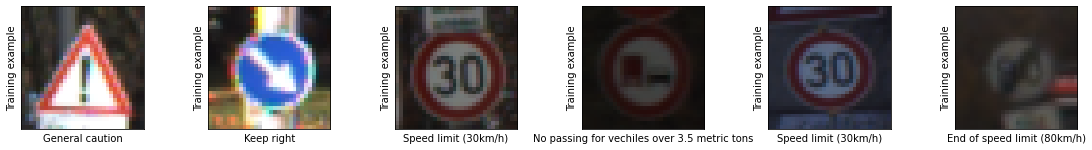

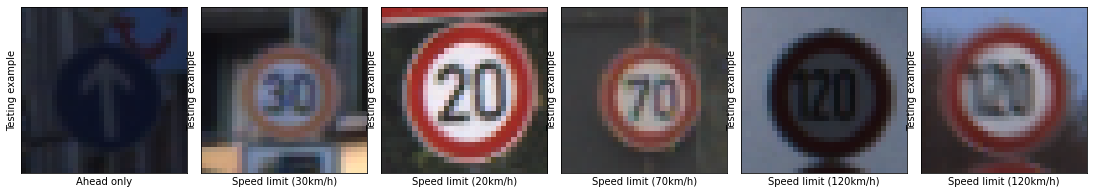

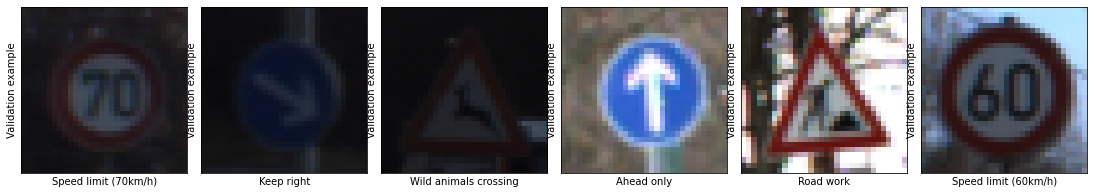

In [8]:

# Plotting sample examples
list_images(X_train, y_train, "Training example")
list_images(X_test, y_test, "Testing example")
list_images(X_validation, y_validation, "Validation example")

Image label=7


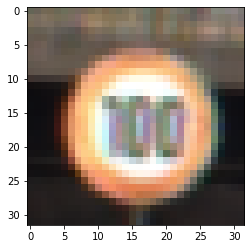

In [9]:
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print('Image label={}'.format(y_train[index]))

## Image Preprocessing




1.   Shuffling
2.   Converting to grayscale
3.   Histogram Equalization
4.   Normalization



In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

In [11]:
def preprocessing(img):
  # Conversion to grayscale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # Historgam Equalization for equal lighting
  img = cv2.equalizeHist(img)
  # Normalization
  img = img/255
  return img

In [12]:
X_train_processed = np.array(list(map(preprocessing,X_train)))
X_validation_processed = np.array(list(map(preprocessing,X_validation)))
X_test_processed = np.array(list(map(preprocessing,X_test)))

In [13]:
X_train_processed = X_train_processed.reshape((34799,32,32,1))
X_validation_processed = X_validation_processed.reshape((4410,32,32,1))
X_test_processed = X_test_processed.reshape((12630,32,32,1))

In [14]:
print(X_train_processed.shape)
print(X_validation_processed.shape)
print(X_test_processed.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


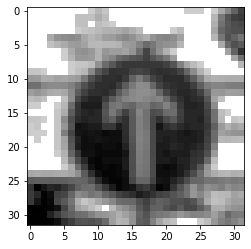

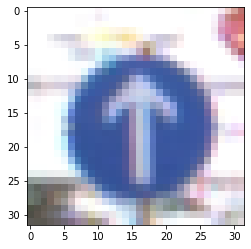

In [15]:
i = random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())


## Model Archietecture

In [16]:
model = Sequential()
# Adding convolution layer
# filers,size_of_filter,activation,input_shape
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer
model.add(Dropout(0.25))
# another layer
model.add(Conv2D(64,(5,5),activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten image
model.add(Flatten())
# dense layer
model.add(Dense(256,activation='relu'))
# dropout
model.add(Dropout(0.5))
# output layer
model.add(Dense(43,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [17]:
model.compile(Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(X_train_processed,
                    y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 10s 147ms/step - loss: 3.5605 - accuracy: 0.0675 - val_loss: 3.4856 - val_accuracy: 0.1510
Epoch 2/50
70/70 [==============================] - 9s 130ms/step - loss: 3.2739 - accuracy: 0.1655 - val_loss: 3.0320 - val_accuracy: 0.3304
Epoch 3/50
70/70 [==============================] - 9s 131ms/step - loss: 2.6931 - accuracy: 0.3190 - val_loss: 2.3811 - val_accuracy: 0.4261
Epoch 4/50
70/70 [==============================] - 9s 131ms/step - loss: 2.1890 - accuracy: 0.4201 - val_loss: 1.9400 - val_accuracy: 0.5057
Epoch 5/50
70/70 [==============================] - 9s 131ms/step - loss: 1.8467 - accuracy: 0.4897 - val_loss: 1.6035 - val_accuracy: 0.5726
Epoch 6/50
70/70 [==============================] - 9s 131ms/step - loss: 1.5948 - accuracy: 0.5438 - val_loss: 1.3556 - val_accuracy: 0.6408
Epoch 7/50
70/70 [==============================] - 9s 131ms/step - loss: 1.4085 - accuracy: 0.5863 - val_loss: 1.1748 - val_accuracy: 0.6986
Epoch

## Evaluating performance of the model

In [19]:
score = model.evaluate(X_test_processed,y_test)
print('Test Accuracy = ',score[1])

395/395 [==============================] - 3s 6ms/step - loss: 0.3128 - accuracy: 0.9188
Test Accuracy =  0.9188440442085266


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

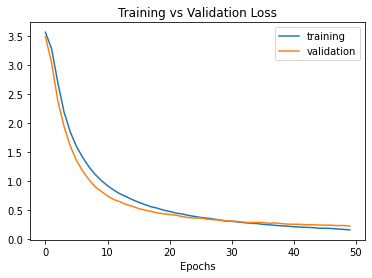

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.show()

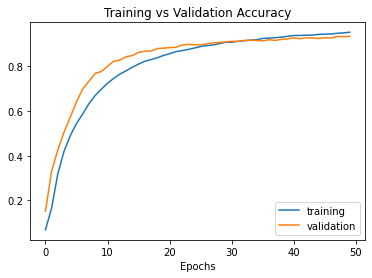

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.show()

In [23]:
prediction = model.predict_classes(X_test_processed)
y_true_label = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


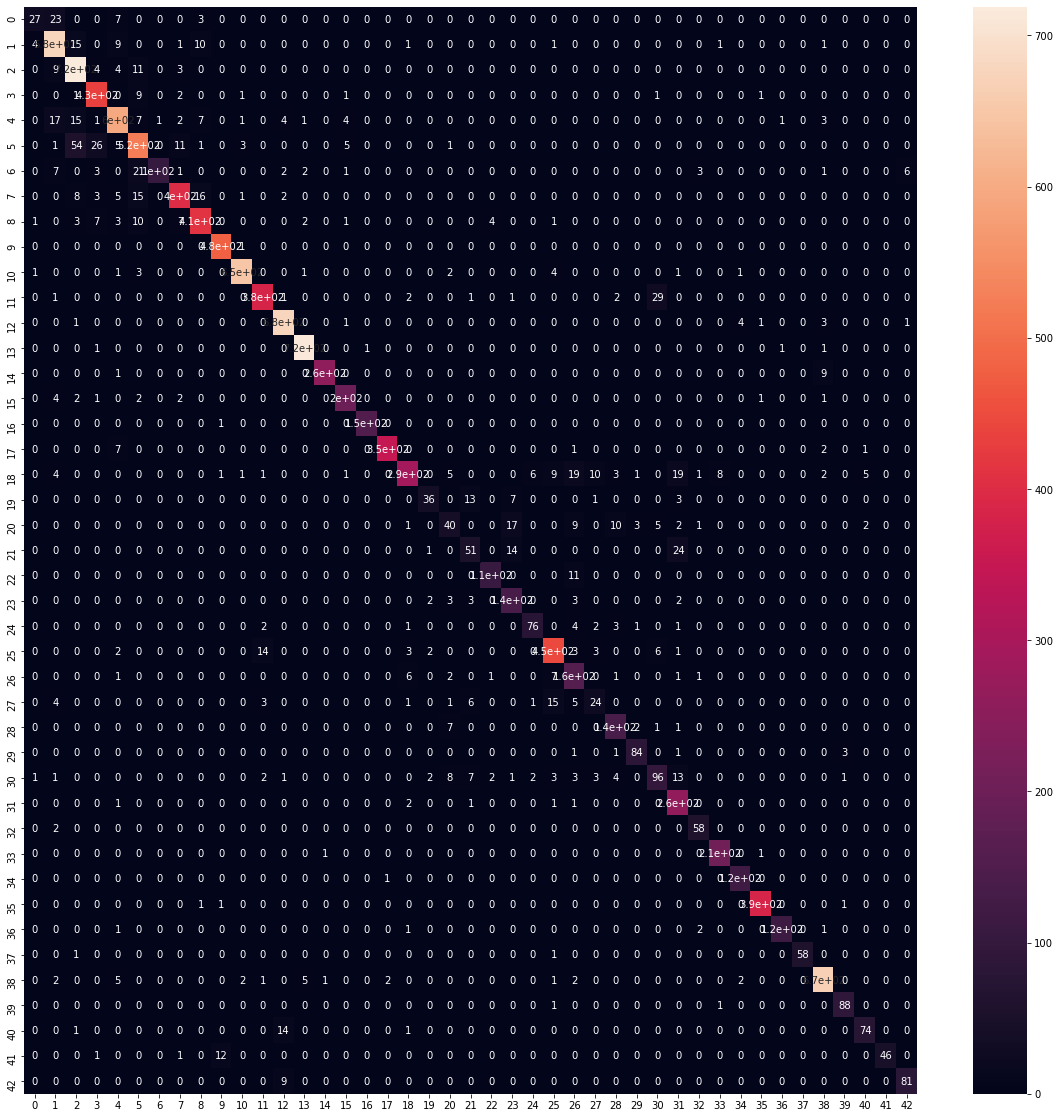

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)

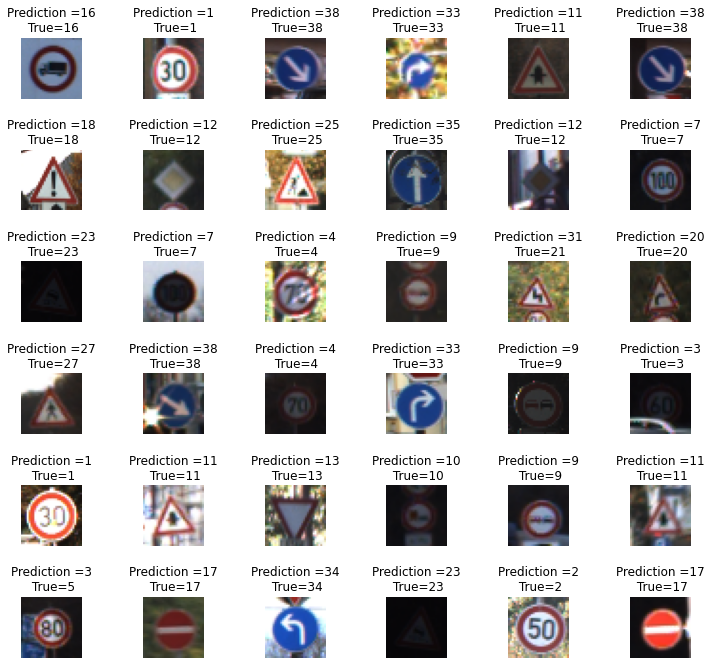

In [25]:
L=6
W=6
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [26]:
model.save('model.h5')